In [1]:
# introduction to computer vision

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file

zip_ref = zipfile.ZipFile("pizza_steak.zip")

zip_ref.extractall()
zip_ref.close()

--2023-06-22 17:36:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.4MB/s    in 3.2s    

2023-06-22 17:36:42 (32.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [3]:
import os

# walkthorugh the pizza steak direcotry and list the number of files

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 0 directories and 250 images in 'pizza_steak/test/steak'


In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_name = np.array(sorted([item for item in data_dir.glob("*")]))
print(class_name)

[PosixPath('pizza_steak/train/pizza') PosixPath('pizza_steak/train/steak')]


In [5]:
# visualising our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # setting up the target directory to view the images from here
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  # read in the image and the n plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")

  return img



['332557.jpg']
Image shape: (289, 512, 3)


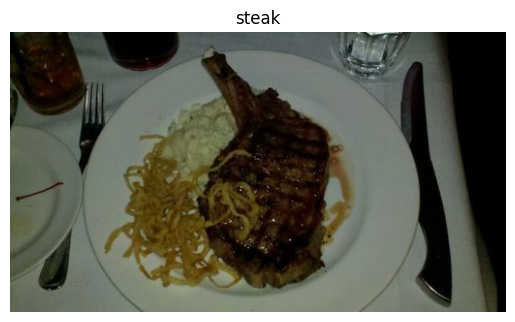

In [6]:
# viewing a random image from the training dataset for which we have created the function above
img = view_random_image("pizza_steak/train/","steak")

In [7]:
#  end to end example for neural network training
# we will build a cnn to find patterns in our images, more specifically we need a way to
# :load our images
# :pre-process our images
# :build a cnn to find patterns in our images
# :fit the cnn to our trinaing data



In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocessing the data to get the value of data in 0 to 1
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)


# setup paths to our data diresctories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# importing the data from the directory and converting it into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

# building a cnn model which is the same as tiny VGG architecture

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters = 10,
                        kernel_size = 3,
                        activation = "relu",
                        input_shape = (224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation = "relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                             padding = "valid"),
  tf.keras.layers.Conv2D(10,3,activation = "relu"),
  tf.keras.layers.Conv2D(10,3,activation = "relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation = "sigmoid")
])

model1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

history1 = model1.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 32s 358ms/step - loss: 0.5731 - accuracy: 0.7153 - val_loss: 0.4189 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 11s 244ms/step - loss: 0.4396 - accuracy: 0.8013 - val_loss: 0.3674 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 12s 247ms/step - loss: 0.3863 - accuracy: 0.8420 - val_loss: 0.3706 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3389 - accuracy: 0.8653 - val_loss: 0.3383 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 13s 279ms/step - loss: 0.2659 - accuracy: 0.8920 - val_loss: 0.3798 - val_accuracy: 0.8280


In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [10]:
# using the same model that we had created in the initial lessons using multiple hidden layers and neurons
tf.random.set_seed(42)
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

history2 = model2.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 216ms/step - loss: 0.7294 - accuracy: 0.4907 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 263ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 224ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 215ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [11]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

model3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

history3 = model3.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))



Epoch 1/5
47/47 [==============================] - 15s 270ms/step - loss: 2.3714 - accuracy: 0.5820 - val_loss: 0.8027 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.5903 - accuracy: 0.7353 - val_loss: 0.5118 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 11s 226ms/step - loss: 0.5913 - accuracy: 0.7400 - val_loss: 0.8312 - val_accuracy: 0.6220
Epoch 4/5
47/47 [==============================] - 11s 227ms/step - loss: 0.7442 - accuracy: 0.7087 - val_loss: 0.4474 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 13s 268ms/step - loss: 0.5862 - accuracy: 0.7560 - val_loss: 0.4357 - val_accuracy: 0.7980


In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


['1658186.jpg']
Image shape: (512, 512, 3)
['244505.jpg']
Image shape: (382, 512, 3)


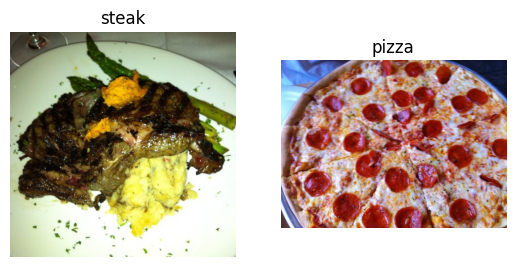

In [13]:
#  binary classification using cnn broken down
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen1 = ImageDataGenerator(rescale = 1./255)
test_datagen1 = ImageDataGenerator(rescale = 1./255)


In [15]:
# loading in the data from the directories and turning tem into usable data
train_data1 = train_datagen1.flow_from_directory(directory = train_dir,
                                                target_size = (224,224),
                                                class_mode = "binary",
                                                batch_size = 32)

test_data1 = test_datagen1.flow_from_directory(directory = test_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
 images, labels = train_data1.next()

In [17]:
len(images),len(labels)

(32, 32)

In [18]:
images[0].shape

(224, 224, 3)

In [19]:
# creating a baseline cnn model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [20]:
# create the model which will act as our baseline model

model4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape = (224,224,3)),
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    Flatten(),
    Dense(1,activation = "sigmoid")
])

In [21]:
# # creating a new model with adjusted parameters to work better without overfitting
# fitting a machien learning model is essentially in three steps

# 0. Creating a baseline
# 1. Best the baseline by overfitting a larger model
# 2. Reduce overfitting

# Ways to induce overfitting
# 1. increase the number of conv layers
# 2. increase the number of conv filters
# 3. add another dense layer to the output of the flattened layer


# Reducing overfitting
# 1. Add data augmentations
# 2. Add regularization layers
# 3. Add more data

In [22]:
# creating the noew model as our new baseline model
model5 = Sequential([
    Conv2D(10,3,activation = "relu",input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")
])


In [23]:
model5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = Adam(),
              metrics = ["accuracy"])
history5 = model5.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 16s 277ms/step - loss: 0.6393 - accuracy: 0.6367 - val_loss: 0.5913 - val_accuracy: 0.6760
Epoch 2/5
47/47 [==============================] - 11s 232ms/step - loss: 0.5531 - accuracy: 0.7273 - val_loss: 0.4466 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.4613 - accuracy: 0.7887 - val_loss: 0.3724 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4181 - accuracy: 0.8107 - val_loss: 0.4589 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4049 - accuracy: 0.8273 - val_loss: 0.3415 - val_accuracy: 0.8560


In [24]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

ValueError: ignored

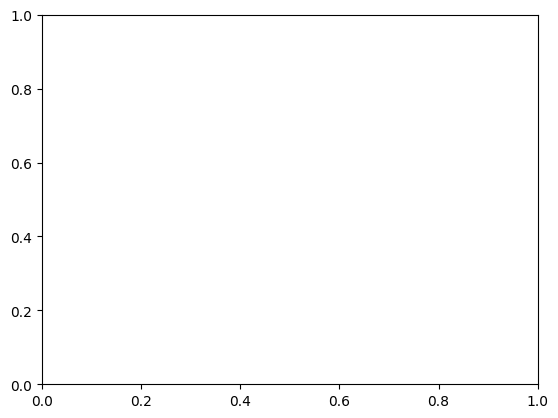

In [25]:
plt.plot(len(history5.history['loss']),history5.history['loss'],c = "b")
plt.plot(len(history5.history['loss']),history5.history['val_loss'],c = "g")
plt.xlabel("epoch value")
plt.ylabel("loss comparison")
plt.show()

plt.figure()
plt.plot(len(history5.history['loss']),history5.history['accuracy'],c = "r")
plt.plot(len(history5.history['loss']),history5.history['val_accuracy'],c = "y")
plt.xlabel("epoch value")
plt.ylabel("accuracy comparison")
plt.show()


In [26]:
# working with data augmentation

train_data_augment = ImageDataGenerator(rescale = 1./255,
                                        rotation_range = 0.2,
                                        shear_range = 0.2,
                                        zoom_range = 0.2,
                                        width_shift_range = 0.2,
                                        height_shift_range = 0.3,
                                        horizontal_flip = True)

# creating image data generator with and without data augmentation

train_datagennew = ImageDataGenerator(rescale = 1./255)

test_datagennew = ImageDataGenerator(rescale = 1./255)

In [27]:
train_data_augmented = train_data_augment.flow_from_directory(train_dir,
                                                              target_size = (224,224),
                                                              batch_size = 32,
                                                              class_mode = "binary",
                                                              shuffle = True)

# create a non augmented traind ata batch

train_data_latest = train_datagennew.flow_from_directory(train_dir,
                                                         target_size = (224,224),
                                                         batch_size = 32,
                                                         class_mode = "binary",
                                                         shuffle = True)
test_data_latest = test_datagennew.flow_from_directory(test_dir,
                                                         target_size = (224,224),
                                                         batch_size = 32,
                                                         class_mode = "binary",
                                                         shuffle = True)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [28]:
images,labels = train_data_latest.next()
augimages,auglabels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

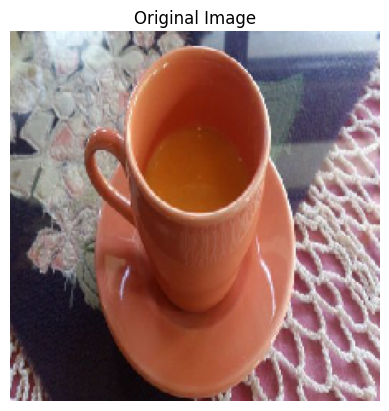

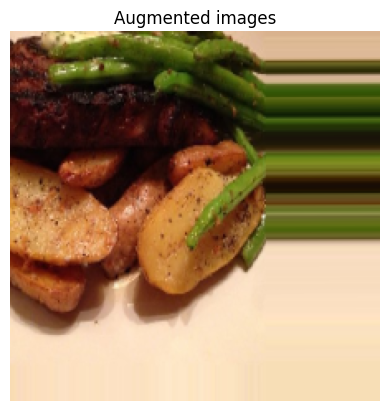

In [29]:
import random

random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augimages[random_number])
plt.title("Augmented images")
plt.axis(False)

In [30]:
  # we have already visualised what augmented training data looks like and we are now going to create a model which can be used better to vidualise the data and the result thereof


In [31]:
model6 = Sequential([
    Conv2D(10,3,activation = "relu",input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")
])

model6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = Adam(),
               metrics = ["Accuracy"])

history6 = model6.fit(train_data_augmented,
                      epochs = 5,
                      steps_per_epoch = len(train_data_augmented),
                      validation_data = test_data_latest,
                      validation_steps = len(test_data_latest))

Epoch 1/5
47/47 [==============================] - 28s 551ms/step - loss: 0.6745 - Accuracy: 0.5647 - val_loss: 0.6285 - val_Accuracy: 0.5960
Epoch 2/5
47/47 [==============================] - 26s 543ms/step - loss: 0.5582 - Accuracy: 0.7160 - val_loss: 0.4678 - val_Accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 25s 535ms/step - loss: 0.5321 - Accuracy: 0.7447 - val_loss: 0.4099 - val_Accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 28s 598ms/step - loss: 0.4983 - Accuracy: 0.7587 - val_loss: 0.3856 - val_Accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 26s 548ms/step - loss: 0.4743 - Accuracy: 0.7827 - val_loss: 0.3622 - val_Accuracy: 0.8480


--2023-06-22 17:45:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-06-22 17:45:23 (91.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



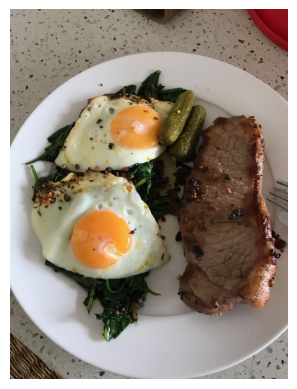

In [32]:
#  testing on our own custom data

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [33]:
steak.shape

(4032, 3024, 3)

In [34]:
 model6.predict(steak)

ValueError: ignored

In [35]:
newvector = tf.expand_dims(steak,axis = 0)
newvector.shape

TensorShape([1, 4032, 3024, 3])

In [36]:
model6.predict(newvector)

ValueError: ignored

In [37]:
# creating a helper function to import, resize and adapt the image to be readily usable by the model
def load_and_prep_img(filename,img_shape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,size = [img_shape,img_shape])
  img = img/255.
  return img

In [38]:
steaknew = load_and_prep_img("03-steak.jpeg")
steaknew

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [39]:
pred_val = model6.predict(tf.expand_dims(steaknew,axis = 0))
pred_val

1/1 [==============================] - 0s 191ms/step


array([[0.8202443]], dtype=float32)

In [40]:
# remind ourselves of our class names
class_name

array([PosixPath('pizza_steak/train/pizza'),
       PosixPath('pizza_steak/train/steak')], dtype=object)

In [41]:
pred_class = class_name[[int(tf.round(pred_val))]]
pred_class

array([PosixPath('pizza_steak/train/steak')], dtype=object)

In [42]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread("03-pizza-dad.jpeg")

--2023-06-22 17:46:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.03s   

2023-06-22 17:46:06 (92.2 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



In [43]:
pizzanew = load_and_prep_img("03-pizza-dad.jpeg")
pred_valnew = model6.predict(tf.expand_dims(pizzanew,axis = 0))
pred_valnew

1/1 [==============================] - 0s 22ms/step


array([[0.16188972]], dtype=float32)

In [44]:
pred_class = class_name[[int(tf.round(pred_valnew))]]
pred_class

array([PosixPath('pizza_steak/train/pizza')], dtype=object)

In [45]:
# # working with multi class image classificattion model
# 1. become one with the data which means visualising the data
# 2. preprocess the data
# 3. create a model
# 4. fit the model
# 5. evaluate the model
# 6. adjust different hyper paramerterss
# # 7. repeat until satisfied

In [46]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-06-22 17:46:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  40.5MB/s    in 14s     

2023-06-22 17:46:21 (36.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [47]:
import zipfile

zipref = zipfile.ZipFile("10_food_classes_all_data.zip")
zipref.extractall()
zipref.close()

In [48]:
import os

for dirpath,dirname,filename in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirname)} directories and {len(filename)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 1

In [49]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [50]:
import numpy as np
import pathlib

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

['1942333.jpg']
Image shape: (288, 512, 3)


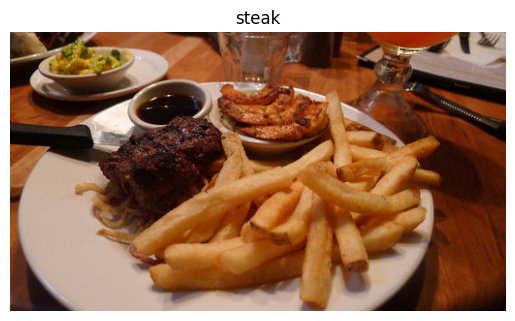

In [51]:
import random

img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [52]:
# preprocessing the data and preparing it for the model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale = 1./255)
test_data_gen = ImageDataGenerator(rescale = 1./255)


train_data = train_data_gen.flow_from_directory(train_dir,
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = "categorical")

test_data = test_data_gen.flow_from_directory(test_dir,
                                              target_size = (224,224),
                                              batch_size = 32,
                                              class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [53]:
img, label = train_data.next()
# img, label

In [54]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Activation

In [55]:
model8 = Sequential([
    Conv2D(10,3, input_shape = (224,224,3)),
    Activation(activation = "relu"),
    Conv2D(10,3),
    Activation(activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation = "softmax")
])

model8.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = Adam(),
               metrics = ["Accuracy"])

history8 = model8.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 57s 235ms/step - loss: 2.1972 - Accuracy: 0.1943 - val_loss: 1.9840 - val_Accuracy: 0.2768
Epoch 2/5
235/235 [==============================] - 55s 233ms/step - loss: 1.9360 - Accuracy: 0.3264 - val_loss: 1.9363 - val_Accuracy: 0.3196
Epoch 3/5
235/235 [==============================] - 54s 230ms/step - loss: 1.6199 - Accuracy: 0.4539 - val_loss: 1.9133 - val_Accuracy: 0.3292
Epoch 4/5
235/235 [==============================] - 54s 231ms/step - loss: 1.0978 - Accuracy: 0.6381 - val_loss: 2.1703 - val_Accuracy: 0.3132
Epoch 5/5
235/235 [==============================] - 55s 233ms/step - loss: 0.5171 - Accuracy: 0.8388 - val_loss: 2.8943 - val_Accuracy: 0.2996


In [ ]:
# increase the data you have
# simplify the model you have
# use data augmentation
# use transfer learning - preferably from the next module

In [61]:
model9 = Sequential([
    Conv2D(10,3,activation = "relu",input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation = "softmax")
])

model9.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = Adam(),
               metrics = ['accuracy'])

# history9 = model9.fit(train_data,
#                       epochs = 5,
#                       steps_per_epoch = len(train_data),
#                       validation_data = test_data,
#                       validation_steps = len(test_data))

In [62]:
history9 = model9.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 54s 225ms/step - loss: 2.0860 - accuracy: 0.2583 - val_loss: 1.8895 - val_accuracy: 0.3540
Epoch 2/5
235/235 [==============================] - 53s 226ms/step - loss: 1.7294 - accuracy: 0.4116 - val_loss: 1.8339 - val_accuracy: 0.3600
Epoch 3/5
235/235 [==============================] - 52s 223ms/step - loss: 1.3610 - accuracy: 0.5565 - val_loss: 1.9146 - val_accuracy: 0.3520
Epoch 4/5
235/235 [==============================] - 52s 222ms/step - loss: 0.9308 - accuracy: 0.7116 - val_loss: 2.0784 - val_accuracy: 0.3412
Epoch 5/5
235/235 [==============================] - 52s 223ms/step - loss: 0.5503 - accuracy: 0.8395 - val_loss: 2.4337 - val_accuracy: 0.3248


In [65]:
# trying to simplify the model did not really work so instead we will now work on data augmentation
# trying to reduce overfitting working with image data generator and using data augmentation

train_data_gen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range = 0.2,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

train_data_augmented = train_data_gen.flow_from_directory(train_dir,
                                                          target_size = (224,224),
                                                          batch_size = 32,
                                                          class_mode = "categorical",
                                                          shuffle = True)
test_data_gen = ImageDataGenerator(rescale = 1./255)
test_data_aug = test_data_gen.flow_from_directory(test_dir)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [67]:
model10 = Sequential([
    Conv2D(10,3,activation = "relu", input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation = "softmax")
])

model10.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = Adam(),
                metrics = ["accuracy"])

history10 = model10.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 129s 542ms/step - loss: 2.1615 - accuracy: 0.2195 - val_loss: 1.9517 - val_accuracy: 0.2948
Epoch 2/5
235/235 [==============================] - 127s 539ms/step - loss: 2.0574 - accuracy: 0.2709 - val_loss: 1.9110 - val_accuracy: 0.3248
Epoch 3/5
235/235 [==============================] - 128s 546ms/step - loss: 1.9888 - accuracy: 0.3096 - val_loss: 1.8396 - val_accuracy: 0.3716
Epoch 4/5
235/235 [==============================] - 128s 544ms/step - loss: 1.9431 - accuracy: 0.3312 - val_loss: 1.8451 - val_accuracy: 0.3656
Epoch 5/5
235/235 [==============================] - 127s 539ms/step - loss: 1.9164 - accuracy: 0.3401 - val_loss: 1.7849 - val_accuracy: 0.3800


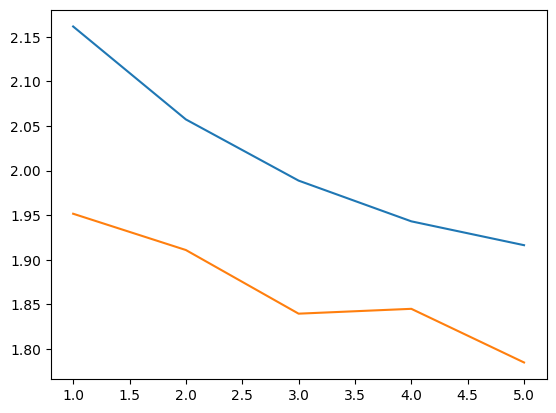

In [70]:
plt.plot(range(1,6),history10.history["loss"])
plt.plot(range(1,6),history10.history["val_loss"])

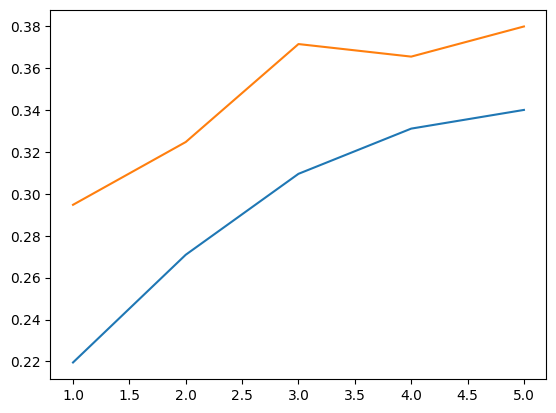

In [71]:
plt.plot(range(1,6),history10.history["accuracy"])
plt.plot(range(1,6),history10.history["val_accuracy"])

In [ ]:
model11 = tf.keras.models.clone(model8)
model11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = Adam(),
                metrics = ["accuracy"])

history11 = model11.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data_aug,
                        validation_steps = len(test_data_aug))